# Estymatory największej wiarygodności

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [39]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu = 1
sigma = 1

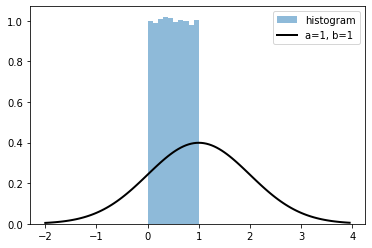

In [40]:
t = np.arange(-2, 4, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$ \mu=\frac{1}{n}\sum_{i=1}^n x_i $</li>
<li>$ \sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2 $</li>
</ul>

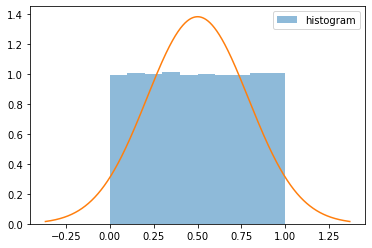

In [41]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)

fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.legend()

mu = np.mean(data)
sigma = np.std(data)
t = np.linspace(mu - 3*sigma, mu + 3*sigma, N)
plt.plot(t, stats.norm.pdf(t, mu, sigma))
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

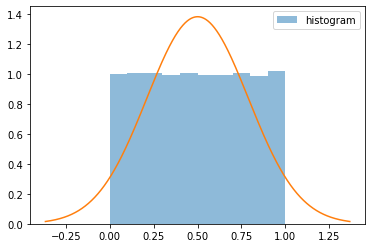

In [42]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)

fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.legend()

mu, sigma = stats.norm.fit(data)
t = np.linspace(mu - 3*sigma, mu + 3*sigma, N)
plt.plot(t, stats.norm.pdf(t, mu, sigma))
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [43]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [44]:
def l(x):
    mu,sigma = x
    return -np.sum(np.log(Gpdf(data,mu, np.abs(sigma))))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [45]:
params = [(0, 1), (0, 2), (1, 1), (0.5, 0.2)]

for mu, sigma in params:
    print(l((mu, sigma)))


108571.72120835174
165378.03834843292
108567.56745682006
35344.837380023


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [46]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [47]:
x0 = np.asarray((1,1))
res2 = optimize.fmin_cg(l, x0)
print(res2)

         Current function value: 17757.892233
         Iterations: 9
         Function evaluations: 165
         Gradient evaluations: 51
[0.50004153 0.28899103]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

0 1 1


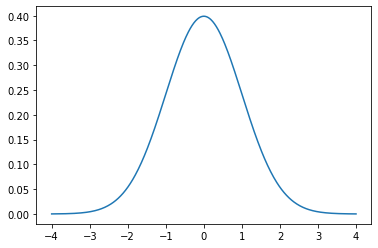

0 1 0.5


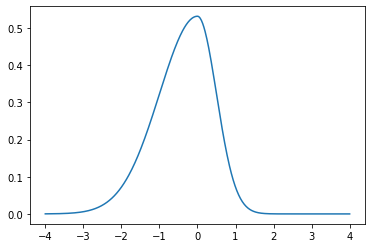

1 0.5 1


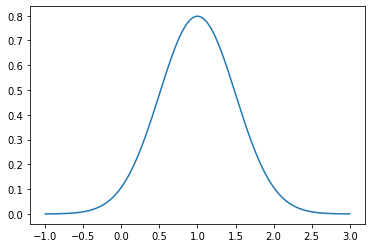

In [48]:
def SN(x, mu, sigma, tau):
    c = np.sqrt(2/np.pi) * sigma**-1 * (1+tau)**-1
    return np.where(x <= mu, c*np.exp(-1/(2*sigma**2)*(x-mu)**2), c*np.exp(-1/(2 * tau**2 * sigma**2)*(x-mu)**2))

params = [(0, 1, 1), (0, 1, 1/2), (1, 1/2, 1)]
for mu, sigma, tau in params:
    print(mu, sigma, tau)
    x_tr = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
    y_tr = SN(x_tr, mu, sigma, tau)
    plt.plot(x_tr,y_tr)
    plt.show()


# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [49]:
def l2(x):
    mu, sigma, tau = x
    return -np.sum(np.log(SN(data, mu, np.abs(sigma), np.abs(tau))))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [50]:
x0 = np.asarray((1,1,1))
res3 = optimize.fmin_cg(l2, x0)
print(res3)

         Current function value: 17641.025126
         Iterations: 143
         Function evaluations: 1488
         Gradient evaluations: 369
[0.10812185 0.06223579 8.27612472]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [68]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

mu = np.mean(data)
sigma = np.std(data)
tau = np.std(data)
print(mu, sigma, tau)

x0 = np.asarray((mu, sigma, tau))
x1 = np.asarray((mu, sigma))


3.795042687747036 2.1036283563444593 2.1036283563444593


         Current function value: 1094.276701
         Iterations: 1
         Function evaluations: 30
         Gradient evaluations: 10
         Current function value: 984.728630
         Iterations: 81
         Function evaluations: 820
         Gradient evaluations: 202


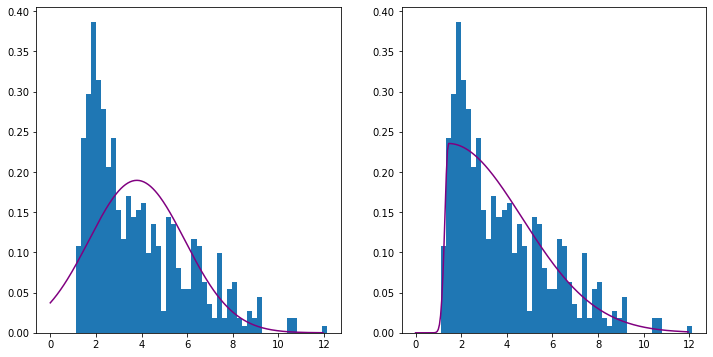

In [69]:
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(12)

ax[0].hist(data, bins = 50, density = True)
ax[1].hist(data, bins = 50, density = True)

x_tr = np.arange(0, 12, 0.05)

mu, sigma = optimize.fmin_cg(l, x1)
y_tr = Gpdf(x_tr, mu, sigma)
ax[0].plot(x_tr, y_tr, label = 'N(mu, sigma)', color = 'purple')

mu, sigma, tau = optimize.fmin_cg(l2, x0)
y_tr = SN(x_tr, mu, sigma, tau)
ax[1].plot(x_tr, y_tr, label = 'SN(mu, sigma, tau)', color = 'purple')


plt.show()